<a href="https://colab.research.google.com/github/akhilesh-kanmanthreddy/Superconductivity_Temperature_Dataframe_Project/blob/main/Super_Conductivity_Model_Testing_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Data**

In [2]:
#installing Packages
import pandas as pd
import os

In [3]:
superc_df= pd.read_csv("/content/drive/MyDrive/superconductivty+data (1)/train.csv")

In [4]:
superc_df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


# **Reducing Dataframe**

In [5]:
#Loading important features file to extract top 10 features
important_features_df = pd.read_csv("/content/drive/MyDrive/superconductivty+data (1)/important_features_file (2) (1).csv")

In [6]:
top_ten_features = important_features_df['Feature'][:10]

In [7]:

# Create a new DataFrame containing only the top ten features and the critical temperature
important_superc_df = superc_df[top_ten_features.tolist() + ['critical_temp']]

In [8]:
important_superc_df.head()

,range_ThermalConductivity,wtd_gmean_ThermalConductivity,std_atomic_mass,wtd_gmean_Valence,wtd_entropy_ThermalConductivity,gmean_ElectronAffinity,mean_Density,wtd_mean_Valence,std_Density,wtd_range_Valence,critical_temp
0,399.97342,0.621979,51.968828,2.219783,0.262848,60.123179,4654.35725,2.257143,3306.162897,1.085714,29.0
1,429.97342,0.619735,47.094633,2.210679,0.567706,69.833315,5821.48580,2.257143,3767.403176,1.128571,26.0
2,399.97342,0.619095,51.968828,2.232679,0.250477,60.123179,4654.35725,2.271429,3306.162897,1.114286,19.0
3,399.97342,0.620535,51.968828,2.226222,0.257045,60.123179,4654.35725,2.264286,3306.162897,1.100000,22.0
4,399.97342,0.624878,51.968828,2.206963,0.272820,60.123179,4654.35725,2.242857,3306.162897,1.057143,23.0


# **Splitting Dataframe**

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

In [10]:
x = important_superc_df.drop(columns=['critical_temp'])  # Input features
y = important_superc_df['critical_temp']                # Target variable

In [11]:

# test_size=0.2 means 20% of the data will be used for testing, and 80% for training
# random_state is an optional parameter to ensure reproducibility (same split every time)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [12]:
# Print the shapes to verify the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12757, 10)
y_train shape: (12757,)
X_test shape: (8506, 10)
y_test shape: (8506,)


# **Scaling Data**

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [14]:
# Extract the input features (X) and the target variable (y)
X = superc_df.drop(columns=['critical_temp'])  # Input features
y = superc_df['critical_temp']                # Target variable

In [15]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

In [17]:

# Fit the scaler on the training data and transform the training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Deep network with keras**

In [17]:
#importing dependenies
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [61]:
#creating model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer, single node for regression task

In [62]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [63]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50
532/532 [==============================] - 2s 3ms/step - loss: 703.0213 - val_loss: 382.2466
Epoch 2/50
532/532 [==============================] - 2s 3ms/step - loss: 370.0396 - val_loss: 311.1963
Epoch 3/50
532/532 [==============================] - 1s 3ms/step - loss: 318.3755 - val_loss: 310.2793
Epoch 4/50
532/532 [==============================] - 2s 3ms/step - loss: 302.1579 - val_loss: 270.5007
Epoch 5/50
532/532 [==============================] - 2s 3ms/step - loss: 289.8906 - val_loss: 298.6600
Epoch 6/50
532/532 [==============================] - 2s 4ms/step - loss: 283.6367 - val_loss: 256.1724
Epoch 7/50
532/532 [==============================] - 2s 4ms/step - loss: 278.8771 - val_loss: 251.1070
Epoch 8/50
532/532 [==============================] - 1s 2ms/step - loss: 274.7718 - val_loss: 262.2096
Epoch 9/50
532/532 [==============================] - 2s 3ms/step - loss: 267.4909 - val_loss: 245.6124
Epoch 10/50
532/532 [==============================] - 2s 3ms/st

In [65]:
# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

133/133 [==============================] - 1s 6ms/step - loss: 201.9182
Mean Squared Error on Test Set: 201.91815185546875


In [28]:

# Make predictions
predictions = model.predict(X_test)

133/133 [==============================] - 0s 1ms/step


# **Simple Artifial Nueral Netowrk with SK-learn**

In [18]:
#importing Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Create and train the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(50,), random_state=42)

In [20]:
# Make predictions on the test set
y_pred = mlp_model.predict(X_test_scaled)

In [21]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 237.52081861170302
R-squared: 0.793654024963235


# **Complex Artificial Nueral Network**

##ANN 1

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
# Create and train the MLPRegressor model with more layers
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(50, 50, 50), random_state=42)

In [25]:
# Make predictions on the test set
y_pred = mlp_model.predict(X_test_scaled)



In [26]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [27]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 168.22725086082164
R-squared: 0.8538527430583707


##ANN 2

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Create and train the updated MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(75,), activation='tanh', solver='adam',
                         learning_rate_init=0.001, max_iter=500, random_state=42)

In [35]:
# Train the model
mlp_model.fit(X_train_scaled, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(75,), max_iter=500,
             random_state=42)

In [36]:
# Make predictions on the test set
y_pred = mlp_model.predict(X_test_scaled)

In [37]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 189.9322503775272
R-squared: 0.8349965463063338


##ANN 3

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the updated MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='sgd',
                         learning_rate_init=0.01, max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1151.313916419391
R-squared: -0.000202820306592022


##ANN 4

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the MLPRegressor model with more layers
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100), activation='relu',
                         solver='adam', random_state=42)

# Train the model
mlp_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 171.286536997092
R-squared: 0.8511949912688858


# **Linear Regression Model**

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [68]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

In [69]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 302.0075125501189
R-squared: 0.7376312737139084


# **Polynomial Regression Model**

## Degree 2

In [2]:
#importing dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Apply PolynomialFeatures to transform the input features into polynomial features
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

In [23]:
# Initialize and train the Linear Regression model on the polynomial features
poly_lr_model = LinearRegression()
poly_lr_model.fit(X_train_poly, y_train)

LinearRegression()

In [24]:
# Make predictions on the test set using the polynomial regression model
y_pred_poly = poly_lr_model.predict(X_test_poly)

In [25]:
# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [26]:
print("Polynomial Regression Model:")
print(f"Mean Squared Error: {mse_poly}")
print(f"R-squared: {r2_poly}")

Polynomial Regression Model:
Mean Squared Error: 453.0960093628309
R-squared: 0.606373292313022


## Degree 3


In [19]:
#importing dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Apply PolynomialFeatures to transform the input features into polynomial features
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

In [ ]:
# Apply PolynomialFeatures to transform the input features into polynomial features
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

In [ ]:
# Initialize and train the Linear Regression model on the polynomial features
poly_lr_model = LinearRegression()
poly_lr_model.fit(X_train_poly, y_train)

In [ ]:
# Make predictions on the test set using the polynomial regression model
y_pred_poly = poly_lr_model.predict(X_test_poly)

In [ ]:
# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [ ]:
print("Polynomial Regression Model:")
print(f"Mean Squared Error: {mse_poly}")
print(f"R-squared: {r2_poly}")

degree 3 crashes due to the limited memory in RAM.

# **Random Forest Regressor**

## RFR 1

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Create and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [44]:
# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [45]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

In [46]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [47]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 81.17503328707778
R-squared: 0.9294792705322943


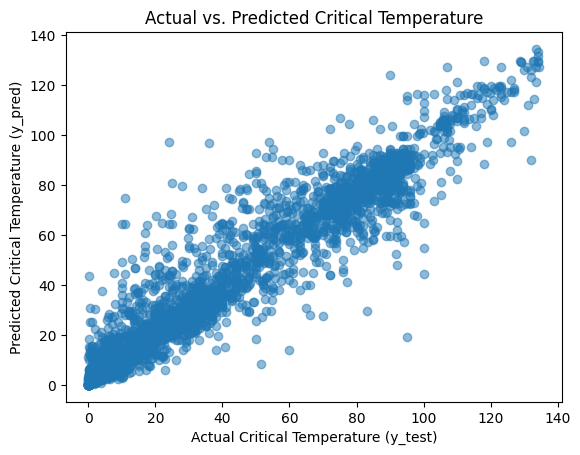

In [48]:
# Plot the relationship between y_test and y_pred using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Critical Temperature (y_test)')
plt.ylabel('Predicted Critical Temperature (y_pred)')
plt.title('Actual vs. Predicted Critical Temperature')
plt.show()

## RFR 2

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

In [52]:
# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
# Perform Grid Search with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

In [54]:
# Get the best model and its hyperparameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

AttributeError: ignored

In [ ]:
# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")